# Homework 2 STAT 6289

## Juntao Su G26082142

For this question, you will experiment with fully connected neural networks and convolutional neural networks,
using the Keras open source package. Keras is one of the simplest deep learning package that serves as a wrapper
on top of TensorFlow, CNTK and Theano. Preliminary steps:
Download the file cifar10 cnn.py from the example folder
https://github.com/keras-team/keras/tree/master/examples
Answer the following questions by modifying the code in cifar10 cnn.py.


In [1]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
import pandas as pd
import numpy as np
from pandas import DataFrame,Series
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


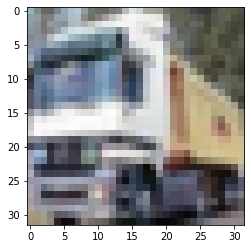

In [17]:
plt.imshow(x_train[1])

#### The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

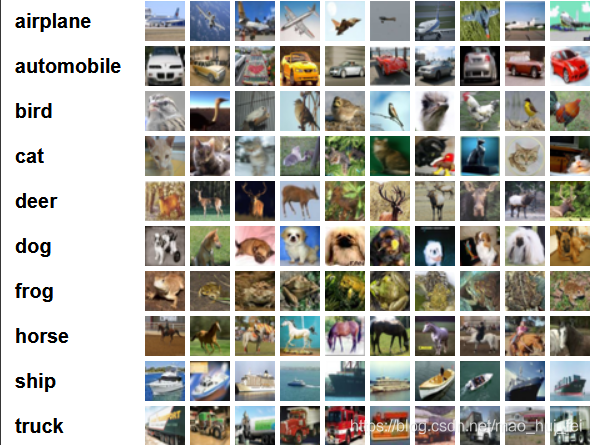

In [18]:
batch_size = 32
num_classes = 10
epochs = 10
data_augmentation = False
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

In [5]:
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    CNN_result=model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    CNN_result=model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])


Not using data augmentation.
Epoch 1/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.7987 - accuracy: 0.3400 - val_loss: 1.5885 - val_accuracy: 0.4250
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4880 - accuracy: 0.4608 - val_loss: 1.3574 - val_accuracy: 0.5144
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3593 - accuracy: 0.5112 - val_loss: 1.2632 - val_accuracy: 0.5528
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2660 - accuracy: 0.5488 - val_loss: 1.1398 - val_accuracy: 0.5981
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1857 - accuracy: 0.5806 - val_loss: 1.0904 - val_accuracy: 0.6152
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1229 - accuracy: 0.6070 - val_loss: 1.0235 - val_accuracy: 0.6441
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0649 - accuracy: 0.6277 - val

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        1

In [8]:
CNN_result.history

{'loss': [1.798665165901184,
  1.4880151748657227,
  1.3593412637710571,
  1.2660127878189087,
  1.1856651306152344,
  1.1229404211044312,
  1.0649020671844482,
  1.0215247869491577,
  0.9748542308807373,
  0.93662428855896],
 'accuracy': [0.33998000621795654,
  0.46077999472618103,
  0.5112000107765198,
  0.5487599968910217,
  0.5806000232696533,
  0.6070399880409241,
  0.6277400255203247,
  0.6455199718475342,
  0.6591799855232239,
  0.673520028591156],
 'val_loss': [1.5885173082351685,
  1.3573719263076782,
  1.2631592750549316,
  1.139786720275879,
  1.0904451608657837,
  1.0235190391540527,
  1.005902886390686,
  0.9605841040611267,
  0.9003896713256836,
  0.912863552570343],
 'val_accuracy': [0.42500001192092896,
  0.5144000053405762,
  0.5527999997138977,
  0.5981000065803528,
  0.6151999831199646,
  0.64410001039505,
  0.6523000001907349,
  0.6669999957084656,
  0.6873000264167786,
  0.685699999332428]}

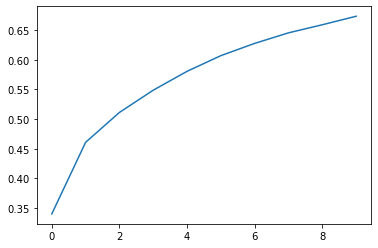

In [9]:
plt.plot(CNN_result.history['accuracy'])

### (a) Compare the accuracy of the convolutional neural network in the file cifar10 cnn.py on the cifar10 dataset to the accuracy of simple dense neural networks with 0, 1, 2, 3 and 4 hidden layers of 512 rectified linear units each. 
Modify the code in cifar10 cnn.pyto obtain simple dense neural networks with 0, 1, 2, 3 and 4 hidden layers of 512 rectified linear units (with a dropout rate of 0.5). Produce a graph that
contains 6 curves (one for the convolutional neural net and one for each dense neural net of 0-4 hidden
layers). The y-axis is the test (validation) accuracy and the x-axis is the number of epochs (# of passes
through the training set). Produce curves for the first 10 epochs. Although 10 epochs is not sufficient to
reach convergence, it is sufficient to see the trend. Explain the results (i.e., why some models perform
better or worse than other models).

In [12]:
Sd_accuracy_total=[] # Sd : simple dense
Sd_accuracy_total.append(CNN_result.history['accuracy'])
Sd_val_accuracy_total=[]
Sd_val_accuracy_total.append(CNN_result.history['val_accuracy'])
for num_hidden_layer in range(5):
    print('number of hidden layers',num_hidden_layer)
    batch_size = 32
    num_classes = 10
    epochs = 10
    data_augmentation = False
    num_predictions = 20

    # The data, split between train and test sets:
    (x_train, y_train), (x_test, y_test) = cifar10.load_data() 
    # Convert class vectors to binary class matrices.
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)

    model = Sequential()

    model.add(Flatten())
    for i in range(num_hidden_layer):
        model.add(Dense(512))
        model.add(Activation('relu'))
        model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))


    # initiate RMSprop optimizer
    opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

    # Let's train the model using RMSprop
    model.compile(loss='categorical_crossentropy',
                optimizer=opt,
                metrics=['accuracy'])

    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255

    if not data_augmentation:
        print('Not using data augmentation.')
        result=model.fit(x_train, y_train,
                batch_size=batch_size,
                epochs=epochs,
                validation_data=(x_test, y_test),
                shuffle=True)
    else:
        print('Using real-time data augmentation.')
        # This will do preprocessing and realtime data augmentation:
        datagen = ImageDataGenerator(
            featurewise_center=False,  # set input mean to 0 over the dataset
            samplewise_center=False,  # set each sample mean to 0
            featurewise_std_normalization=False,  # divide inputs by std of the dataset
            samplewise_std_normalization=False,  # divide each input by its std
            zca_whitening=False,  # apply ZCA whitening
            zca_epsilon=1e-06,  # epsilon for ZCA whitening
            rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
            # randomly shift images horizontally (fraction of total width)
            width_shift_range=0.1,
            # randomly shift images vertically (fraction of total height)
            height_shift_range=0.1,
            shear_range=0.,  # set range for random shear
            zoom_range=0.,  # set range for random zoom
            channel_shift_range=0.,  # set range for random channel shifts
            # set mode for filling points outside the input boundaries
            fill_mode='nearest',
            cval=0.,  # value used for fill_mode = "constant"
            horizontal_flip=True,  # randomly flip images
            vertical_flip=False,  # randomly flip images
            # set rescaling factor (applied before any other transformation)
            rescale=None,
            # set function that will be applied on each input
            preprocessing_function=None,
            # image data format, either "channels_first" or "channels_last"
            data_format=None,
            # fraction of images reserved for validation (strictly between 0 and 1)
            validation_split=0.0)

        # Compute quantities required for feature-wise normalization
        # (std, mean, and principal components if ZCA whitening is applied).
        datagen.fit(x_train)

        # Fit the model on the batches generated by datagen.flow().
        result=model.fit_generator(datagen.flow(x_train, y_train,
                                  batch_size=batch_size),
                                  epochs=epochs,
                                  validation_data=(x_test, y_test),
                                  workers=4)

        # # Save model and weights
        # if not os.path.isdir(save_dir):
        #     os.makedirs(save_dir)
        # model_path = os.path.join(save_dir, model_name)
        # model.save(model_path)
        # print('Saved trained model at %s ' % model_path)

        # # Score trained model.
        # scores = model.evaluate(x_test, y_test, verbose=1)
        # print('Test loss:', scores[0])
        # print('Test accuracy:', scores[1])
    Sd_accuracy_total.append(result.history['accuracy'])
    Sd_val_accuracy_total.append(result.history['val_accuracy'])

number of hidden layers 0
Not using data augmentation.
Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.9783 - accuracy: 0.2939 - val_loss: 1.8817 - val_accuracy: 0.3368
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8470 - accuracy: 0.3559 - val_loss: 1.8194 - val_accuracy: 0.3635
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8131 - accuracy: 0.3662 - val_loss: 1.8024 - val_accuracy: 0.3719
Epoch 4/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.7926 - accuracy: 0.3801 - val_loss: 1.7917 - val_accuracy: 0.3668
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7794 - accuracy: 0.3823 - val_loss: 1.7783 - val_accuracy: 0.3805
Epoch 6/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.7681 - accuracy: 0.3881 - val_loss: 1.7878 - val_accuracy: 0.3717
Epoch 7/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.759

In [14]:
DataFrame(Sd_val_accuracy_total,index=['CNN','Simple dense -0 hidden','Simple dense -1 hidden','Simple dense -2 hidden','Simple dense -3 hidden','Simple dense -4 hidden'])

,0,1,2,3,4,5,6,7,8,9
CNN,0.4250,0.5144,0.5528,0.5981,0.6152,0.6441,0.6523,0.6670,0.6873,0.6857
Simple dense -0 hidden,0.3368,0.3635,0.3719,0.3668,0.3805,0.3717,0.3775,0.3811,0.3884,0.3909
Simple dense -1 hidden,0.3391,0.3891,0.3967,0.4111,0.4463,0.4432,0.4341,0.4659,0.4629,0.4541
Simple dense -2 hidden,0.3180,0.3681,0.4041,0.4109,0.4240,0.4261,0.4317,0.4413,0.4280,0.4454
Simple dense -3 hidden,0.3107,0.3502,0.3876,0.3804,0.4028,0.4120,0.4139,0.4073,0.4257,0.4040
Simple dense -4 hidden,0.2574,0.2988,0.3408,0.3502,0.3479,0.3860,0.3435,0.3475,0.3708,0.3910


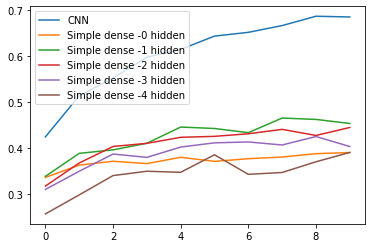

In [15]:
DataFrame(Sd_val_accuracy_total,index=['CNN','Simple dense -0 hidden','Simple dense -1 hidden','Simple dense -2 hidden','Simple dense -3 hidden','Simple dense -4 hidden']).T.plot()

#### Change to 50 epochs

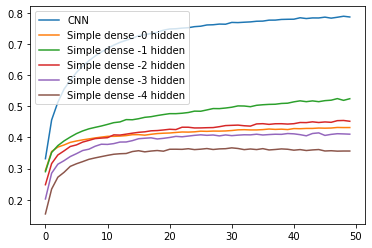

In [22]:
DataFrame(Sd_accuracy_total,index=['CNN','Simple dense -0 hidden','Simple dense -1 hidden','Simple dense -2 hidden','Simple dense -3 hidden','Simple dense -4 hidden']).T.plot()

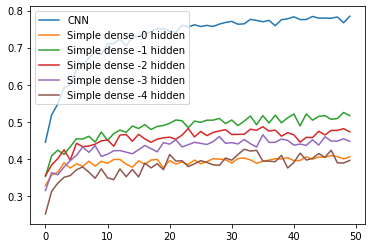

In [23]:
DataFrame(Sd_val_accuracy_total,index=['CNN','Simple dense -0 hidden','Simple dense -1 hidden','Simple dense -2 hidden','Simple dense -3 hidden','Simple dense -4 hidden']).T.plot()

## (b) Compare the accuracy achieved by rectified linear units and sigmoid units in the convolutional neural network in cifar10 cnn.py. 
Modify the code in cifar10 cnn.py to use sigmoid units. Produce a
graph that contains 2 curves (one for rectified linear units and another one for sigmoid units). The y-axis
is the test (validation) accuracy and the x-axis is the number of epochs (# of passes through the training
set). Produce curves for the first 10 epochs. Although 10 epochs is not sufficient to reach convergence, it
is sufficient to see the trend. Explain the results (i.e., why did one model perform better than the other
model). 



In [24]:
accuracy_total=[]
val_accuracy_total=[]
for function_type in ['relu','sigmoid']:
    print('activation function type: ',function_type)
    batch_size = 32
    num_classes = 10
    epochs = 10
    data_augmentation = False
    num_predictions = 20

    # The data, split between train and test sets:
    (x_train, y_train), (x_test, y_test) = cifar10.load_data() 
    # Convert class vectors to binary class matrices.
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)

    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same',
                  input_shape=x_train.shape[1:]))
    model.add(Activation(function_type))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation(function_type))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation(function_type))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation(function_type))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation(function_type))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))


    # initiate RMSprop optimizer
    opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

    # Let's train the model using RMSprop
    model.compile(loss='categorical_crossentropy',
                optimizer=opt,
                metrics=['accuracy'])

    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255

    if not data_augmentation:
        print('Not using data augmentation.')
        result=model.fit(x_train, y_train,
            batch_size=batch_size,
            epochs=epochs,
            validation_data=(x_test, y_test),
            shuffle=True)
    else:
        print('Using real-time data augmentation.')
        # This will do preprocessing and realtime data augmentation:
        datagen = ImageDataGenerator(
            featurewise_center=False,  # set input mean to 0 over the dataset
            samplewise_center=False,  # set each sample mean to 0
            featurewise_std_normalization=False,  # divide inputs by std of the dataset
            samplewise_std_normalization=False,  # divide each input by its std
            zca_whitening=False,  # apply ZCA whitening
            zca_epsilon=1e-06,  # epsilon for ZCA whitening
            rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
            # randomly shift images horizontally (fraction of total width)
            width_shift_range=0.1,
            # randomly shift images vertically (fraction of total height)
            height_shift_range=0.1,
            shear_range=0.,  # set range for random shear
            zoom_range=0.,  # set range for random zoom
            channel_shift_range=0.,  # set range for random channel shifts
            # set mode for filling points outside the input boundaries
            fill_mode='nearest',
            cval=0.,  # value used for fill_mode = "constant"
            horizontal_flip=True,  # randomly flip images
            vertical_flip=False,  # randomly flip images
            # set rescaling factor (applied before any other transformation)
            rescale=None,
            # set function that will be applied on each input
            preprocessing_function=None,
            # image data format, either "channels_first" or "channels_last"
            data_format=None,
            # fraction of images reserved for validation (strictly between 0 and 1)
            validation_split=0.0)

        # Compute quantities required for feature-wise normalization
        # (std, mean, and principal components if ZCA whitening is applied).
        datagen.fit(x_train)

        # Fit the model on the batches generated by datagen.flow().
        result=model.fit_generator(datagen.flow(x_train, y_train,
                          batch_size=batch_size),
                          epochs=epochs,
                          validation_data=(x_test, y_test),
                          workers=4)

    # # Save model and weights
    # if not os.path.isdir(save_dir):
    #     os.makedirs(save_dir)
    # model_path = os.path.join(save_dir, model_name)
    # model.save(model_path)
    # print('Saved trained model at %s ' % model_path)

    # # Score trained model.
    # scores = model.evaluate(x_test, y_test, verbose=1)
    # print('Test loss:', scores[0])
    # print('Test accuracy:', scores[1])
    accuracy_total.append(result.history['accuracy'])
    val_accuracy_total.append(result.history['val_accuracy'])

activation function type:  relu
Not using data augmentation.
Epoch 1/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.7958 - accuracy: 0.3394 - val_loss: 1.5217 - val_accuracy: 0.4495
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4908 - accuracy: 0.4586 - val_loss: 1.3870 - val_accuracy: 0.4995
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.3544 - accuracy: 0.5151 - val_loss: 1.3041 - val_accuracy: 0.5371
Epoch 4/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.2496 - accuracy: 0.5564 - val_loss: 1.1744 - val_accuracy: 0.5820
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1663 - accuracy: 0.5868 - val_loss: 1.1203 - val_accuracy: 0.5977
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0988 - accuracy: 0.6130 - val_loss: 1.0190 - val_accuracy: 0.6400
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - 

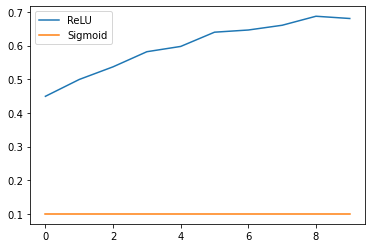

In [25]:
DataFrame(val_accuracy_total,index=['ReLU','Sigmoid']).T.plot()

#### Change to 100 epochs

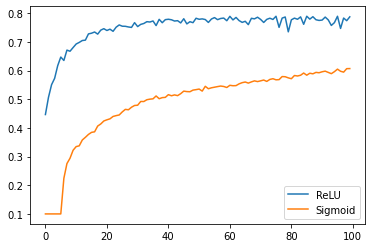

In [27]:
DataFrame(val_accuracy_total,index=['ReLU','Sigmoid']).T.plot()

 ## (C) Compare the accuracy achieved with and without drop out as well as with and without data augmentation in the convolutional neural network in cifar10 cnn.py. 
 Modify the code in cifar10 cnn.py to
turn on and off dropout as well as data augmentation. Produce two graphs (one for training accuracy and
the other one for test accuracy) that each contain 4 curves (with and without dropout as well as with and
without data augmentation). The y-axis is the accuracy (i.e., train or test/validation accuracy) and the xaxis is the number of epochs (# of passes through the training set). Produce curves for as many epochs as
you can up to 100 epochs. Explain the results (i.e., why did some models perform better or worse than
other models and are the results consistent with the theory). No marks will be deducted for doing less than
100 epochs, however make sure to explain what you expect to see in the curves as the number of epochs
reaches 100. 

In [56]:
accuracy_total=[]
val_accuracy_total=[]
for augu_type in [True,False]:
    for drop_type in [True,False]:
        print('Data Augumentation: ',augu_type)
        print('Drop out: ',drop_type)
        batch_size = 32
        num_classes = 10
        epochs = 100
        data_augmentation = augu_type
        num_predictions = 20

        # The data, split between train and test sets:
        (x_train, y_train), (x_test, y_test) = cifar10.load_data() 
        # Convert class vectors to binary class matrices.
        y_train = keras.utils.to_categorical(y_train, num_classes)
        y_test = keras.utils.to_categorical(y_test, num_classes)

        model = Sequential()
        model.add(Conv2D(32, (3, 3), padding='same',
                      input_shape=x_train.shape[1:]))
        model.add(Activation('relu'))
        model.add(Conv2D(32, (3, 3)))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        if drop_type==True:
            model.add(Dropout(0.25))

        model.add(Conv2D(64, (3, 3), padding='same'))
        model.add(Activation('relu'))
        model.add(Conv2D(64, (3, 3)))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        if drop_type==True:
            model.add(Dropout(0.25))

        model.add(Flatten())
        model.add(Dense(512))
        model.add(Activation('relu'))
        if drop_type==True:
            model.add(Dropout(0.5))
        model.add(Dense(num_classes))
        model.add(Activation('softmax'))


        # initiate RMSprop optimizer
        opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

        # Let's train the model using RMSprop
        model.compile(loss='categorical_crossentropy',
                    optimizer=opt,
                    metrics=['accuracy'])

        x_train = x_train.astype('float32')
        x_test = x_test.astype('float32')
        x_train /= 255
        x_test /= 255

        if not data_augmentation:
            print('Not using data augmentation.')
            result=model.fit(x_train, y_train,
                batch_size=batch_size,
                epochs=epochs,
                validation_data=(x_test, y_test),
                shuffle=True)
        else:
            print('Using real-time data augmentation.')
            # This will do preprocessing and realtime data augmentation:
            datagen = ImageDataGenerator(
                featurewise_center=False,  # set input mean to 0 over the dataset
                samplewise_center=False,  # set each sample mean to 0
                featurewise_std_normalization=False,  # divide inputs by std of the dataset
                samplewise_std_normalization=False,  # divide each input by its std
                zca_whitening=False,  # apply ZCA whitening
                zca_epsilon=1e-06,  # epsilon for ZCA whitening
                rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
                # randomly shift images horizontally (fraction of total width)
                width_shift_range=0.1,
                # randomly shift images vertically (fraction of total height)
                height_shift_range=0.1,
                shear_range=0.,  # set range for random shear
                zoom_range=0.,  # set range for random zoom
                channel_shift_range=0.,  # set range for random channel shifts
                # set mode for filling points outside the input boundaries
                fill_mode='nearest',
                cval=0.,  # value used for fill_mode = "constant"
                horizontal_flip=True,  # randomly flip images
                vertical_flip=False,  # randomly flip images
                # set rescaling factor (applied before any other transformation)
                rescale=None,
                # set function that will be applied on each input
                preprocessing_function=None,
                # image data format, either "channels_first" or "channels_last"
                data_format=None,
                # fraction of images reserved for validation (strictly between 0 and 1)
                validation_split=0.0)

            # Compute quantities required for feature-wise normalization
            # (std, mean, and principal components if ZCA whitening is applied).
            datagen.fit(x_train)

            # Fit the model on the batches generated by datagen.flow().
            result=model.fit_generator(datagen.flow(x_train, y_train,
                              batch_size=batch_size),
                      epochs=epochs,
                      validation_data=(x_test, y_test),
                      workers=4)

            # # Save model and weights
            # if not os.path.isdir(save_dir):
            #     os.makedirs(save_dir)
            # model_path = os.path.join(save_dir, model_name)
            # model.save(model_path)
            # print('Saved trained model at %s ' % model_path)

            # # Score trained model.
            # scores = model.evaluate(x_test, y_test, verbose=1)
            # print('Test loss:', scores[0])
            # print('Test accuracy:', scores[1])
        accuracy_total.append(result.history['accuracy'])
        val_accuracy_total.append(result.history['val_accuracy'])

Data Augumentation:  True
Drop out:  True
Using real-time data augmentation.
Epoch 1/100
1563/1563 [==============================] - 21s 13ms/step - loss: 1.8745 - accuracy: 0.3079 - val_loss: 1.6146 - val_accuracy: 0.4118
Epoch 2/100
1563/1563 [==============================] - 21s 13ms/step - loss: 1.5837 - accuracy: 0.4214 - val_loss: 1.5041 - val_accuracy: 0.4576
Epoch 3/100
1563/1563 [==============================] - 21s 13ms/step - loss: 1.4726 - accuracy: 0.4659 - val_loss: 1.2982 - val_accuracy: 0.5346
Epoch 4/100
1563/1563 [==============================] - 21s 13ms/step - loss: 1.3957 - accuracy: 0.4975 - val_loss: 1.2558 - val_accuracy: 0.5421
Epoch 5/100
1563/1563 [==============================] - 21s 13ms/step - loss: 1.3298 - accuracy: 0.5268 - val_loss: 1.2179 - val_accuracy: 0.5710
Epoch 6/100
1563/1563 [==============================] - 22s 14ms/step - loss: 1.2761 - accuracy: 0.5445 - val_loss: 1.1296 - val_accuracy: 0.5988
Epoch 7/100
1563/1563 [==================

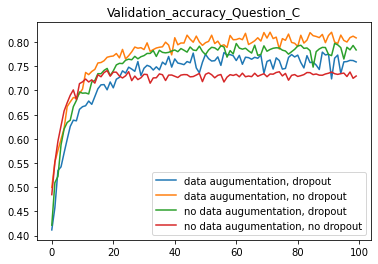

In [59]:
DataFrame(val_accuracy_total,index=['data augumentation, dropout','data augumentation, no dropout','no data augumentation, dropout','no data augumentation, no dropout']).T.plot(title='Validation_accuracy_Question_C')

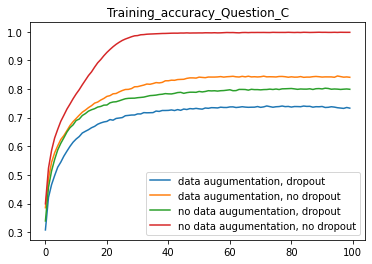

In [60]:
DataFrame(accuracy_total,index=['data augumentation, dropout','data augumentation, no dropout','no data augumentation, dropout','no data augumentation, no dropout']).T.plot(title='Training_accuracy_Question_C')